In [29]:
import numpy as np
import joypy
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as cm
import shap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from collections import Counter
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

import os 

import warnings
warnings.filterwarnings('ignore')

In [9]:
os.getcwd()

'/home/jovyan/졸업작품/UNLV_Project'

In [30]:
data_path = "Dataset/heg_sample_data.csv"
heg_meta = pd.read_csv(data_path)
print(heg_meta.info())
heg_meta.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13652 entries, 0 to 13651
Data columns (total 73 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              13652 non-null  int64  
 1   days_from_entrance                      13652 non-null  float64
 2   age                                     13652 non-null  float64
 3   document.sexo                           13652 non-null  float64
 4   UTI                                     13652 non-null  float64
 5   delta_collect_timestamp_t-t1            13652 non-null  float64
 6   delta_collect_timestamp_t1-t2           13652 non-null  float64
 7   delta_collect_timestamp_t2-t3           13652 non-null  float64
 8   delta_collect_timestamp_t3-t4           13652 non-null  float64
 9   document.freq_cardiaca(t)               13652 non-null  float64
 10  document.freq_cardiaca(t-1)             13652 non-null  fl

,Unnamed: 0,days_from_entrance,age,document.sexo,UTI,delta_collect_timestamp_t-t1,delta_collect_timestamp_t1-t2,delta_collect_timestamp_t2-t3,delta_collect_timestamp_t3-t4,document.freq_cardiaca(t),...,delta_document.pa_sistolica_t3-t4,delta_document.sat_o2_t-t1,delta_document.sat_o2_t1-t2,delta_document.sat_o2_t2-t3,delta_document.sat_o2_t3-t4,delta_document.temperatura_t-t1,delta_document.temperatura_t1-t2,delta_document.temperatura_t2-t3,delta_document.temperatura_t3-t4,outcome
6881,6881,-0.197107,1.014579,0.0,0.0,0.147071,0.221341,1.130439,1.447078,-0.178259,...,0.593964,0.004101,-0.002062,2.558805,-3.415913,-0.660872,-0.350259,-0.157956,0.325859,0.0
899,899,-0.281891,-0.719366,0.0,0.0,0.453091,0.325657,0.404968,0.390850,-0.369970,...,0.133568,0.060615,0.114810,0.672236,-1.299337,-0.144525,-0.024481,0.152412,0.007067,0.0
1515,1515,-0.366674,0.395313,1.0,0.0,0.453091,0.325657,0.404968,0.390850,-1.232671,...,0.133568,0.060615,0.114810,0.672236,-1.299337,-0.144525,-0.024481,0.152412,0.007067,0.0
8291,8291,-0.112324,-1.338632,1.0,0.0,0.181480,0.049746,0.446689,0.456427,-0.034475,...,0.029118,0.820299,0.829661,-1.282333,3.867335,-1.852283,1.568177,-0.555189,2.313997,0.0
9289,9289,-0.197107,0.725588,1.0,0.0,0.119726,1.006792,0.199088,0.472756,0.636515,...,-2.089055,0.004101,1.245523,-0.001954,1.725203,1.613641,-0.350259,-1.292906,0.546763,0.0


In [ ]:
heg_meta.columns.values

### Using HeatMap 

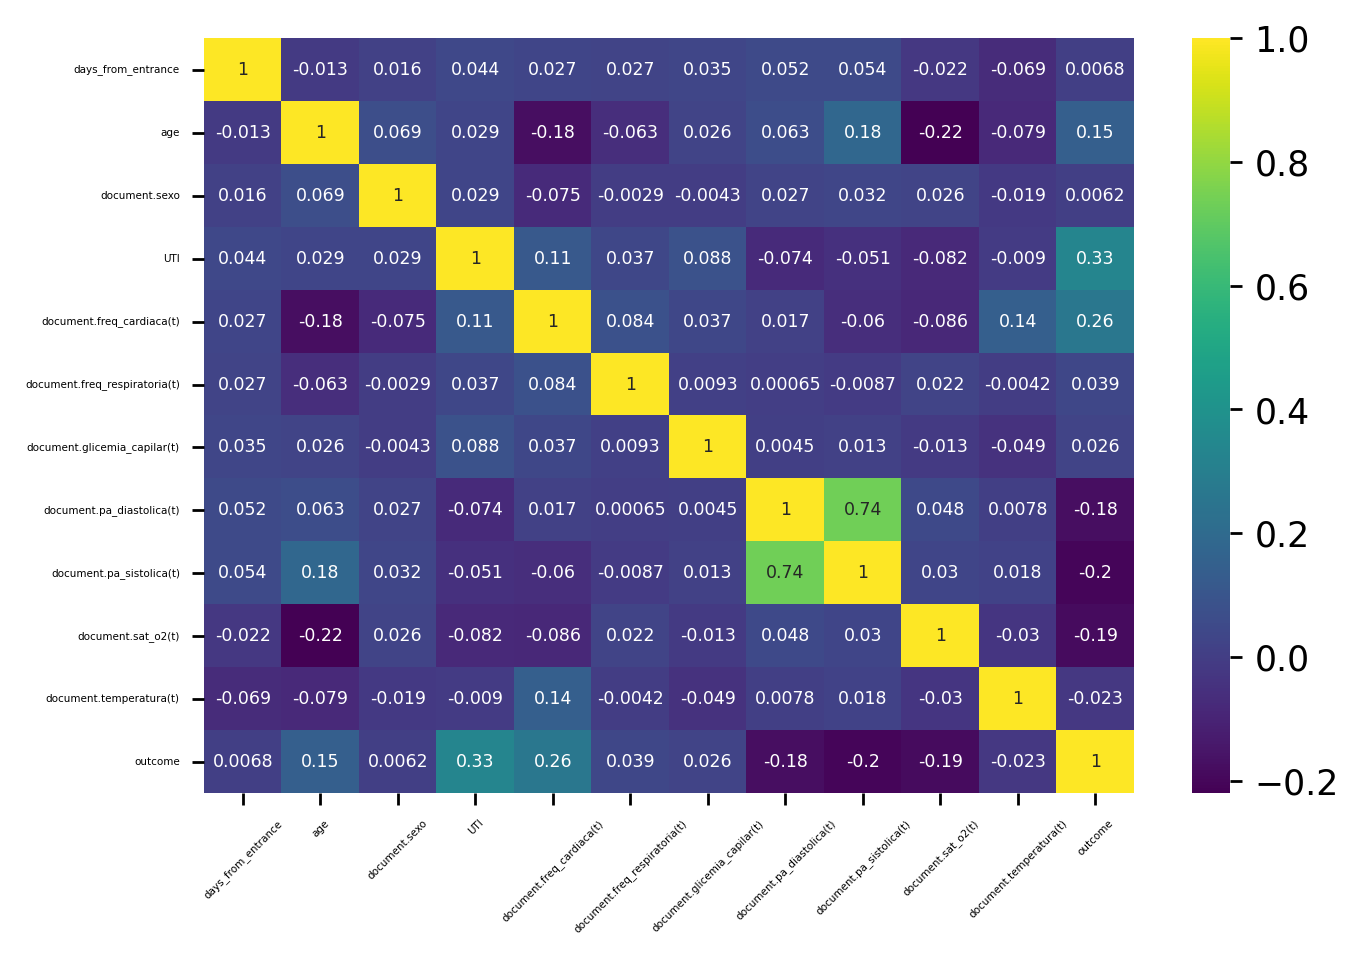

In [31]:
plt.figure(dpi=250)
sns.heatmap(heg_meta.iloc[:,[1,2,3,4,9,14,19,24,29,34,39,72]].corr(), cmap='viridis', annot=True, annot_kws={"size":5})
plt.tick_params(axis="x", labelsize=3)
plt.tick_params(axis="y", labelsize=3)
plt.xticks(rotation=45)
plt.show()

### Using SHAP

[08:54:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


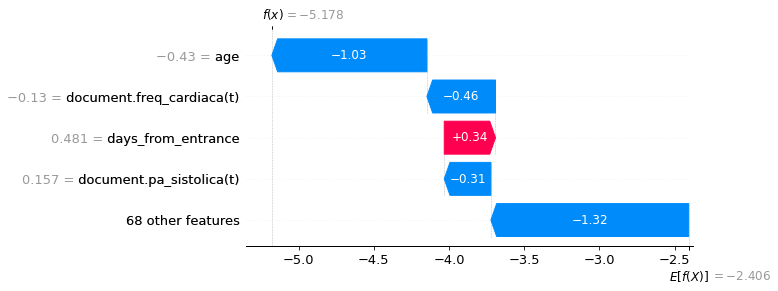

In [32]:
import xgboost as xgb
import shap

X,y = heg_meta.drop(columns = 'outcome'), heg_meta[['outcome']]

model = xgb.XGBClassifier().fit(X,y)
explainer = shap.Explainer(model)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[0], max_display = 5)


### Using Permutaion imfortance

In [38]:
import xgboost as xgb

import eli5
from eli5.sklearn import PermutationImportance

X,y = heg_meta.drop(columns = 'outcome'), heg_meta[['outcome']]
model = xgb.XGBClassifier().fit(X,y)

perm = PermutationImportance(model, random_state=1).fit(X, y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

[09:14:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Weight,Feature
0.0343 ± 0.0020,age
0.0251 ± 0.0011,UTI
0.0149 ± 0.0015,document.pa_sistolica(t)
0.0145 ± 0.0006,document.freq_cardiaca(t)
0.0078 ± 0.0007,document.freq_respiratoria(t)
0.0078 ± 0.0012,days_from_entrance
0.0071 ± 0.0007,Unnamed: 0
0.0065 ± 0.0003,document.freq_cardiaca(t-1)
0.0042 ± 0.0008,delta_collect_timestamp_t-t1
0.0042 ± 0.0007,document.pa_sistolica(t-1)


In [34]:
pip install eli5

  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=299f6453d584972f7aea052e425dc6539ec7932d440cffdba994d55a811c102b
  Stored in directory: /home/jovyan/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
Note: you may need to restart the kernel to use updated packages.
